In [313]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [314]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# data (as pandas dataframes)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# metadata
print(statlog_german_credit_data.metadata)

# variable information
print(statlog_german_credit_data.variables)


{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [315]:
df = X.copy(deep=True)
df['class'] = y['class']
df.head(5)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [425]:
df.iloc[0]['Attribute11']

4

In [316]:
discard_features = []

In [317]:
#Attribute9 <-> Personal status / gender
discard_features.append('Attribute9')

In [318]:
#Attribute13 <-> Age
discard_features.append('Attribute13')

In [319]:
#Attribute11 <-> Present Residence Since
discard_features.append('Attribute11')

In [320]:
#Attribute20 <-> Foreign Workers
discard_features.append('Attribute20')

In [321]:
discard_features

['Attribute9', 'Attribute13', 'Attribute11', 'Attribute20']

Starting from the most important feature - Attribute3 <-> Credit History

<Axes: xlabel='Attribute3', ylabel='count'>

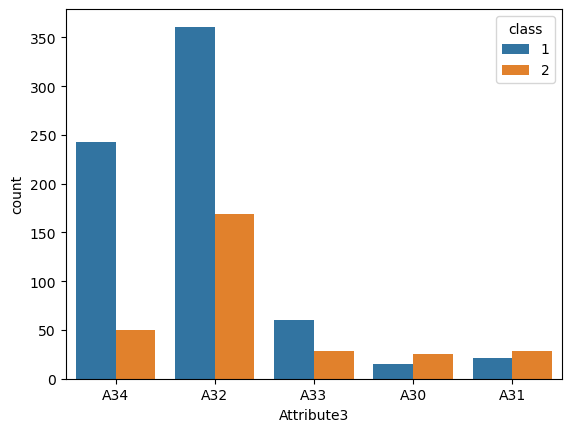

In [322]:
sns.countplot(x=df['Attribute3'],hue=y['class'])

Observations for credit history [A30,A31]

How Creditors with good credit history are bad ones ?

In [323]:
#Observing the [A30, A31]
'''
As per our Intuition credit history [A30, A31] are considered to be good creditors.
'''

'\nAs per our Intuition credit history [A30, A31] are considered to be good creditors.\n'

In [324]:
obs = df[df['Attribute3'].isin(['A30', 'A31','A32'])]
len(obs)

619

In [325]:
obs_bad = df[df['Attribute3'].isin(['A33', 'A34'])]
len(obs_bad)

381

<Axes: xlabel='Attribute1', ylabel='count'>

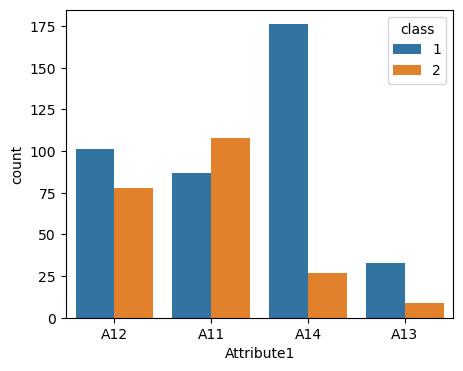

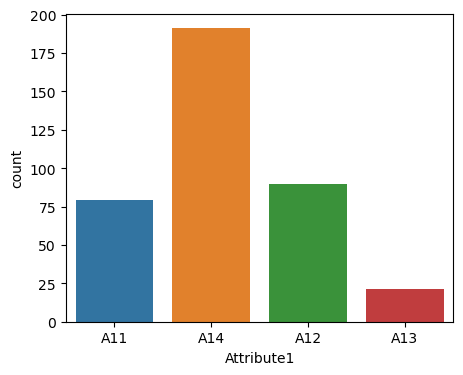

In [326]:
#Observing Status of the existing bank accounts
plt.figure(1,figsize=(5,4))
sns.countplot(x=obs['Attribute1'],hue=obs['class']) #Bad creditors usually have A12,A11,A14 status
plt.figure(2,figsize=(5,4))
sns.countplot(x=obs_bad['Attribute1'])

<Axes: xlabel='Attribute4', ylabel='count'>

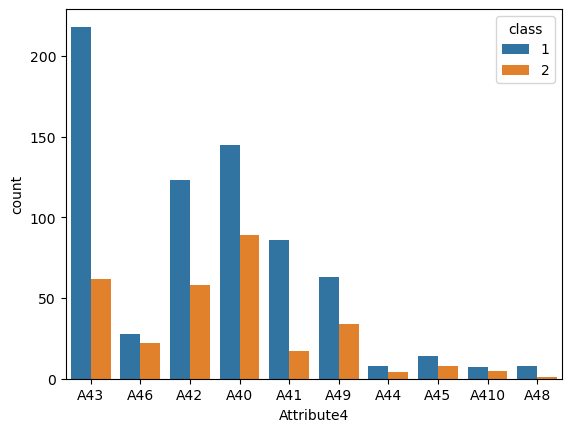

In [327]:
sns.countplot(x=df['Attribute4'],hue=df['class'])

<Axes: xlabel='Attribute4', ylabel='count'>

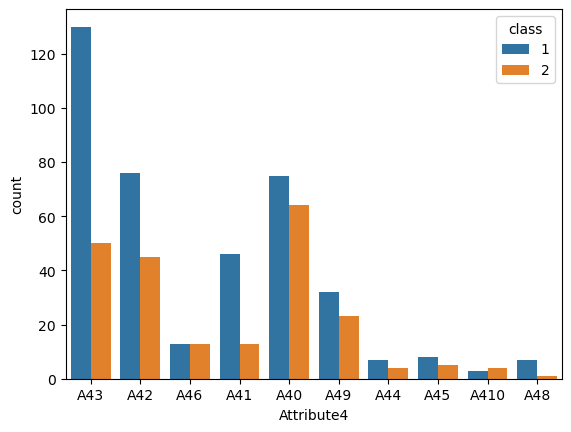

In [328]:
sns.countplot(x=obs['Attribute4'],hue=obs['class'])

In [329]:
#Observing savings account

<Axes: xlabel='Attribute6', ylabel='count'>

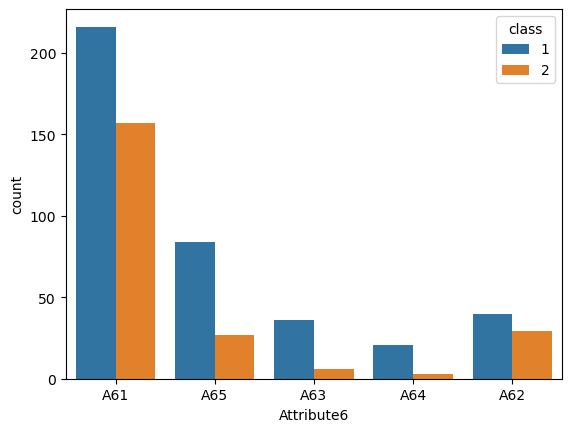

In [330]:
sns.countplot(x=obs['Attribute6'],hue=obs['class'])

<Axes: xlabel='Attribute6', ylabel='count'>

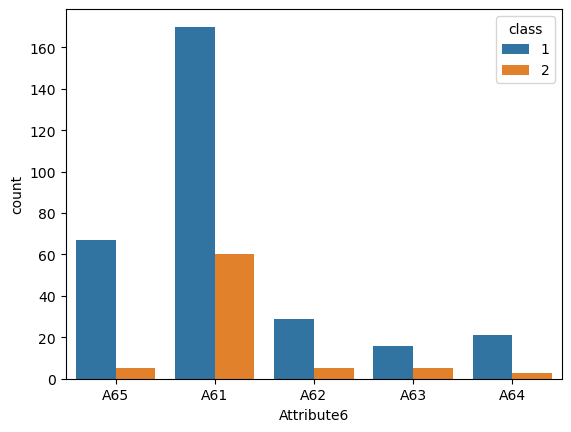

In [331]:
sns.countplot(x=obs_bad['Attribute6'],hue=obs_bad['class'])

In [332]:
temp = obs_bad[obs_bad['Attribute6'] == 'A61']

<Axes: xlabel='Attribute14', ylabel='count'>

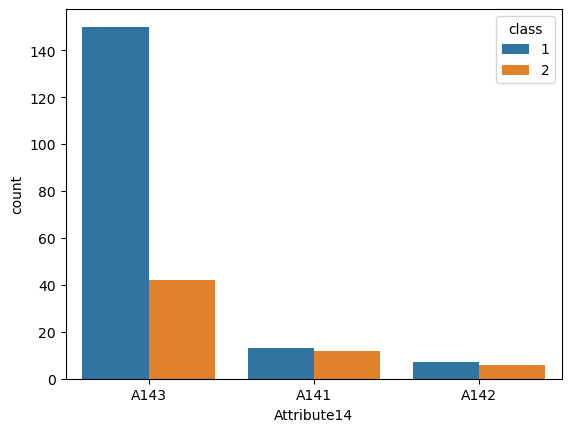

In [333]:
sns.countplot(x=temp['Attribute14'],hue=temp['class'])

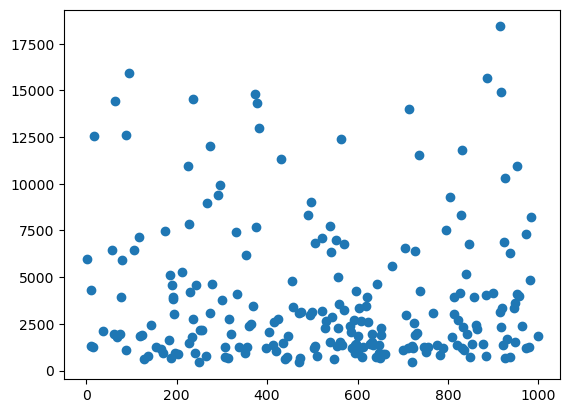

In [334]:
plt.scatter(x=obs[obs['class'] == 2]['Attribute5'].index,y=obs[obs['class'] == 2]['Attribute5'])

<Axes: xlabel='Attribute7', ylabel='count'>

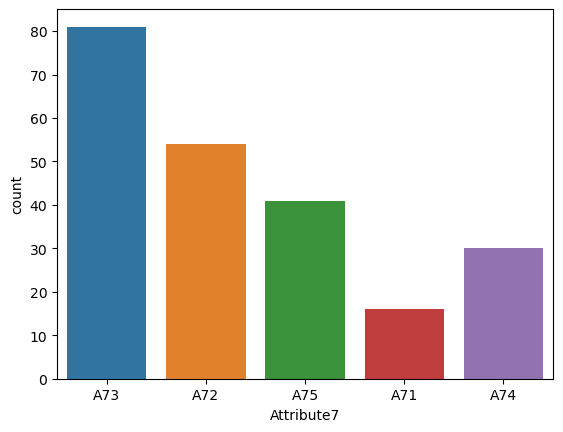

In [335]:
sns.countplot(x=obs[obs['class'] == 2]['Attribute7'])

In [336]:
#Most People with Good credit history are employed and have good experiences too

<Axes: xlabel='Attribute10', ylabel='count'>

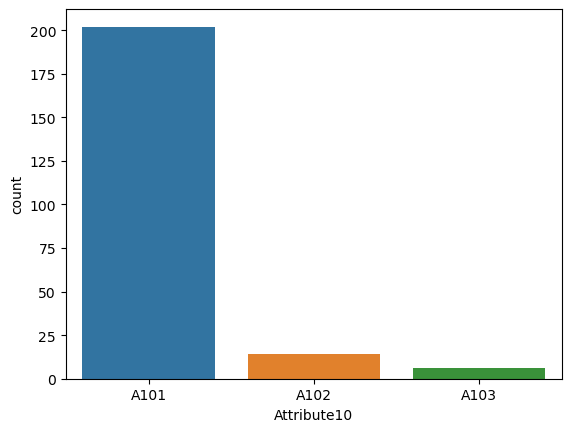

In [337]:
sns.countplot(x=obs[obs['class'] == 2]['Attribute10'])

In [338]:
# People with good credit history mostly have no guarantors [A101]

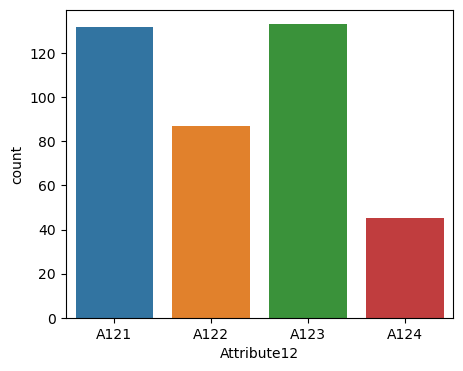

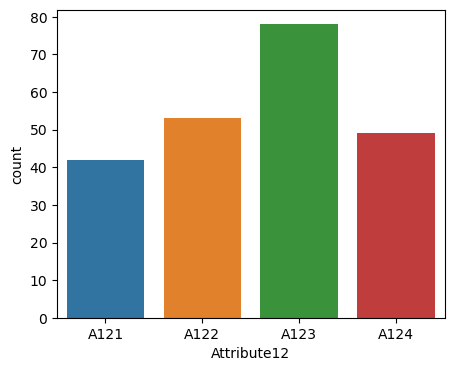

In [339]:
plt.figure(1,figsize=(5,4))
sns.countplot(x=obs[obs['class'] == 1]['Attribute12'], order=['A121','A122','A123','A124'])
plt.figure(2,figsize=(5,4))
sns.countplot(x=obs[obs['class'] == 2]['Attribute12'], order=['A121','A122','A123','A124'])
plt.show()

In [340]:
obs2 = obs[obs['Attribute12'].isin(['A123'])]
obs2.head(5)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
10,A12,12,A32,A40,1295,A61,A72,3,A92,A101,...,A123,25,A143,A151,1,A173,1,A191,A201,2
12,A12,12,A32,A43,1567,A61,A73,1,A92,A101,...,A123,22,A143,A152,1,A173,1,A192,A201,1
14,A11,15,A32,A40,1403,A61,A73,2,A92,A101,...,A123,28,A143,A151,1,A173,1,A191,A201,1
15,A11,24,A32,A43,1282,A62,A73,4,A92,A101,...,A123,32,A143,A152,1,A172,1,A191,A201,2


<Axes: xlabel='Attribute15', ylabel='count'>

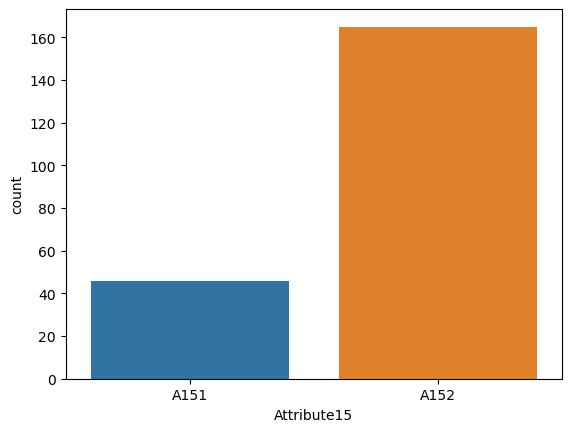

In [341]:
sns.countplot(x=obs2['Attribute15'])

<Axes: xlabel='Attribute14', ylabel='count'>

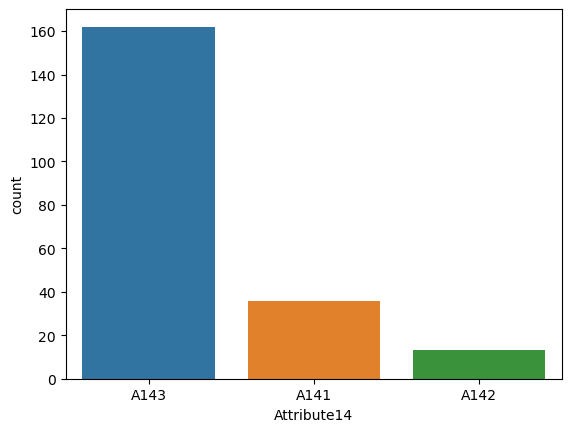

In [342]:
sns.countplot(x=obs2['Attribute14'])    #This can cause negative impact due to bank installment plans

In [343]:
obs3 = obs2[obs2['Attribute14'] == 'A143']
obs3.head(5)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
10,A12,12,A32,A40,1295,A61,A72,3,A92,A101,...,A123,25,A143,A151,1,A173,1,A191,A201,2
12,A12,12,A32,A43,1567,A61,A73,1,A92,A101,...,A123,22,A143,A152,1,A173,1,A192,A201,1
14,A11,15,A32,A40,1403,A61,A73,2,A92,A101,...,A123,28,A143,A151,1,A173,1,A191,A201,1
15,A11,24,A32,A43,1282,A62,A73,4,A92,A101,...,A123,32,A143,A152,1,A172,1,A191,A201,2


In [344]:
len(obs3)

162

<Axes: xlabel='Attribute1', ylabel='count'>

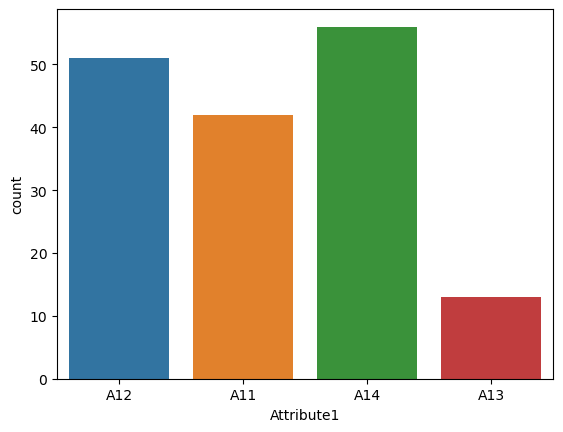

In [345]:
sns.countplot(x=obs3['Attribute1'])

<Axes: xlabel='Attribute4', ylabel='count'>

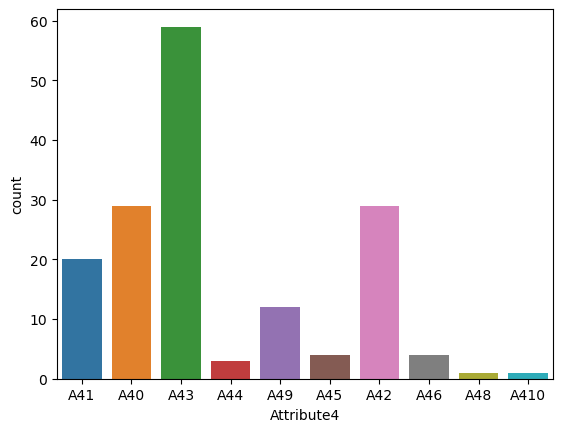

In [346]:
sns.countplot(x=obs3['Attribute4'])

<Axes: xlabel='Attribute10', ylabel='count'>

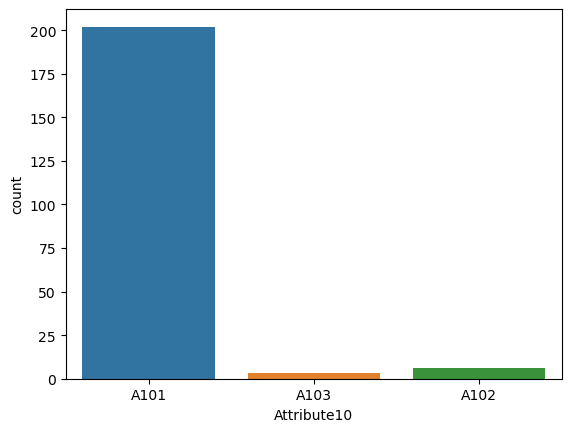

In [347]:
sns.countplot(x=obs2['Attribute10'])

<Axes: ylabel='Attribute5'>

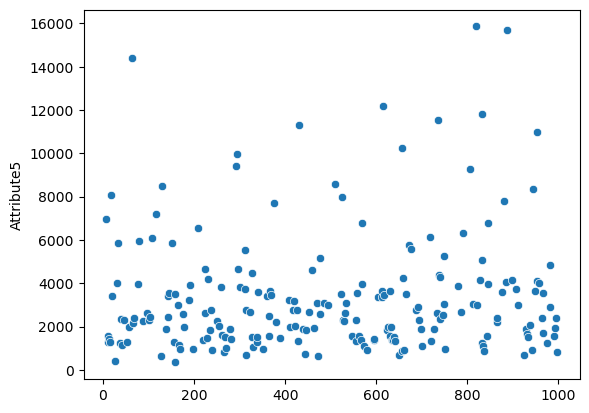

In [348]:
sns.scatterplot(x=obs2['Attribute5'].index,y=obs2['Attribute5'])

<Axes: xlabel='Attribute4', ylabel='count'>

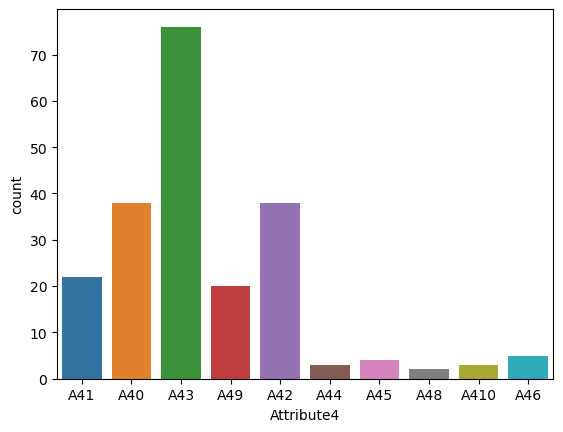

In [349]:
sns.countplot(x=obs2['Attribute4'])

<Axes: xlabel='Attribute16', ylabel='count'>

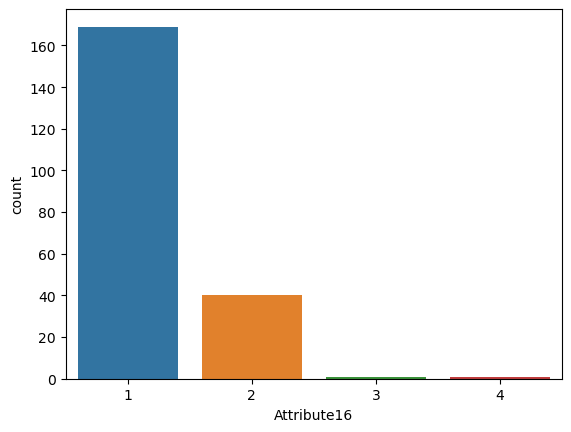

In [350]:
sns.countplot(x=obs2['Attribute16'])

<Axes: xlabel='Attribute19', ylabel='count'>

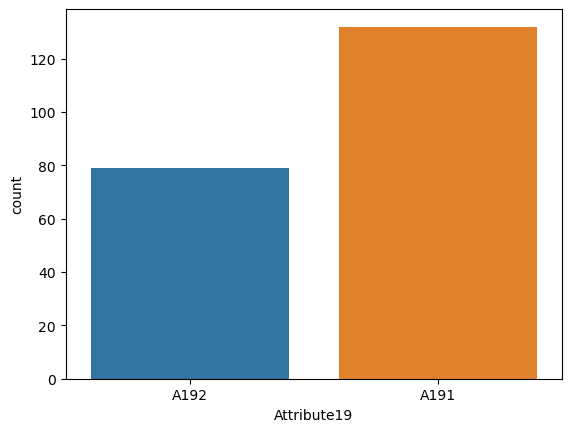

In [351]:
sns.countplot(x=obs2['Attribute19'])

<Axes: xlabel='Attribute17', ylabel='count'>

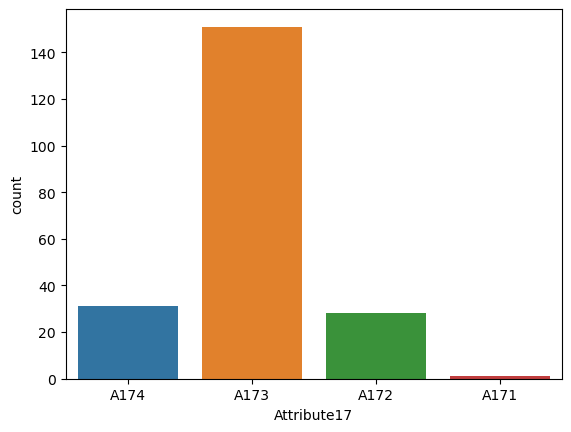

In [352]:
sns.countplot(x=obs2['Attribute17'])

<Axes: ylabel='Attribute8'>

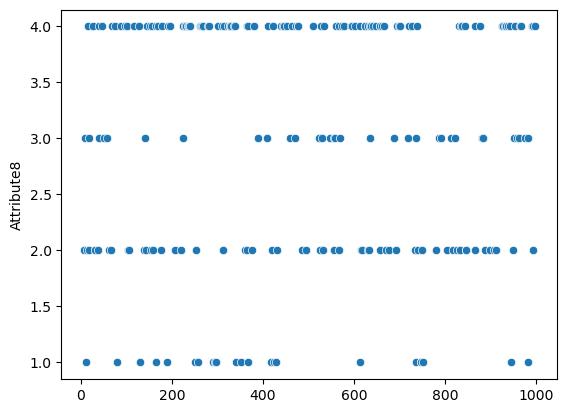

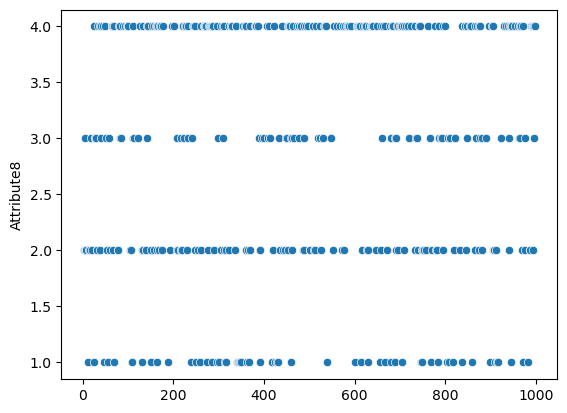

In [353]:
plt.figure(1)
sns.scatterplot(x=obs2['Attribute8'].index,y=obs2['Attribute8'])    #Many people have installment rates high
plt.figure(2)
sns.scatterplot(x=obs[obs['class'] == 1]['Attribute8'].index,y=obs[obs['class'] == 1]['Attribute8'])

<Axes: xlabel='Attribute1', ylabel='count'>

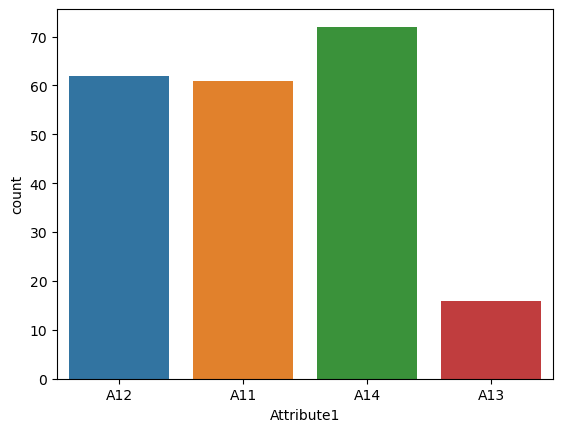

In [354]:
sns.countplot(x=obs2['Attribute1'])

In [355]:
#Observation: Attribute12 -> Positive(A121, A123), Neutral(A122), Negative(A124)

<Axes: xlabel='Attribute14', ylabel='count'>

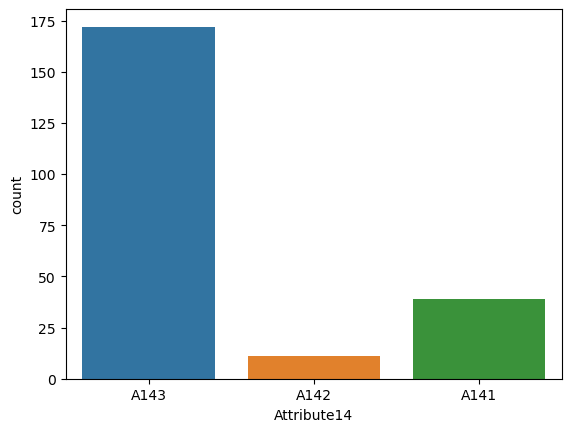

In [356]:
sns.countplot(x=obs[obs['class'] == 2]['Attribute14'])

<Axes: xlabel='Attribute15', ylabel='count'>

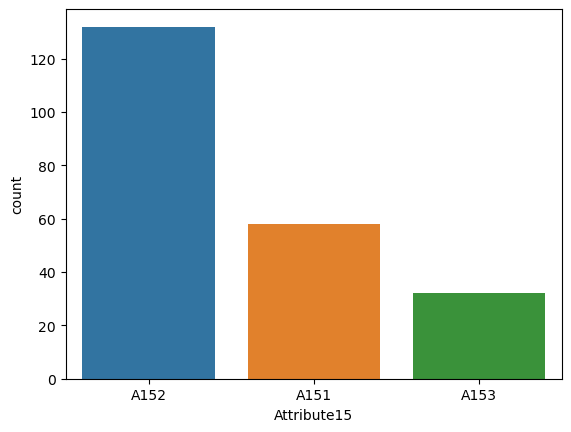

In [357]:
sns.countplot(x=obs[obs['class'] == 2]['Attribute15'])

In [358]:
obs2 = obs[obs['class'] == 2]

In [359]:
obs2_df = obs2[obs2['Attribute15'].isin(['A153','A152'])]

<Axes: xlabel='Attribute10', ylabel='count'>

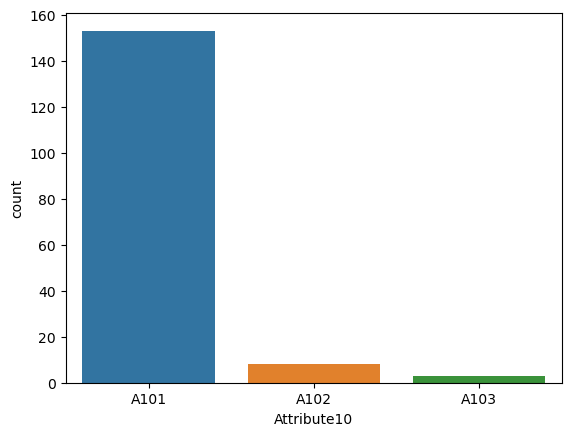

In [360]:
sns.countplot(x=obs2_df['Attribute10'])

<Axes: ylabel='Attribute5'>

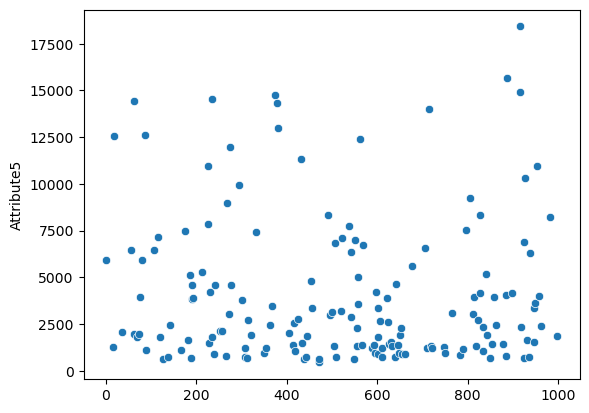

In [361]:
sns.scatterplot(x=obs2_df['Attribute5'].index,y=obs2_df['Attribute5'])

<Axes: xlabel='Attribute17', ylabel='count'>

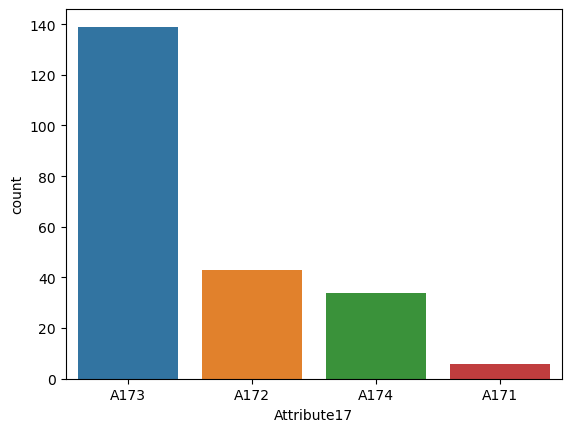

In [362]:
sns.countplot(x=obs[obs['class'] == 2]['Attribute17'])

<Axes: xlabel='Attribute18', ylabel='count'>

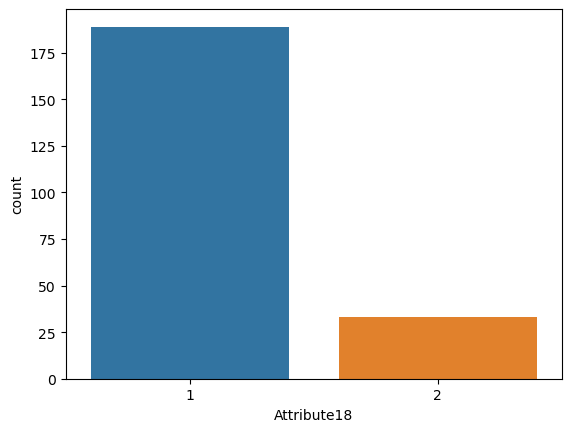

In [363]:
sns.countplot(x=obs[obs['class'] == 2]['Attribute18'])

<Axes: xlabel='Attribute20', ylabel='count'>

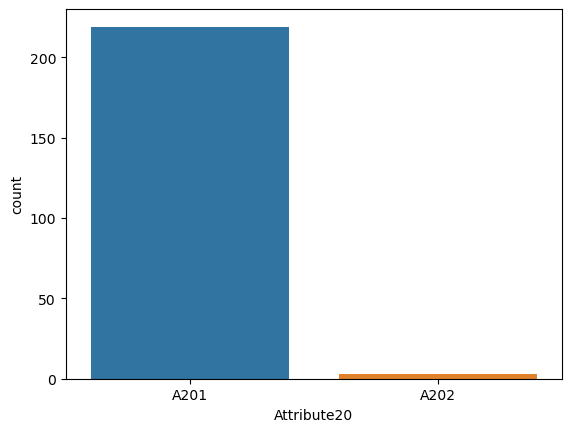

In [364]:
sns.countplot(x=obs[obs['class'] == 2]['Attribute20'])

In [365]:
#Discarding the attribute20 as 96% of data is of A201 hence making it homogeneous

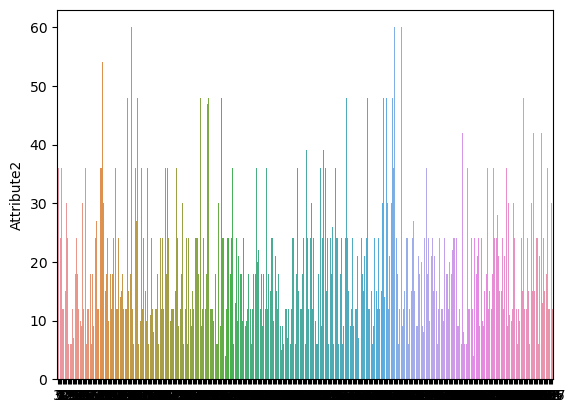

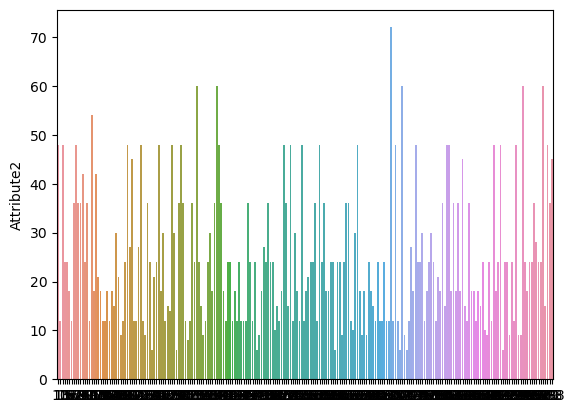

In [366]:
plt.figure(1)
sns.barplot(x=obs[obs['class'] == 1]['Attribute2'].index, y=obs[obs['class'] == 1]['Attribute2'])
plt.figure(2)
sns.barplot(x=obs[obs['class'] == 2]['Attribute2'].index, y=obs[obs['class'] == 2]['Attribute2'])
plt.show()

<Axes: xlabel='Attribute7', ylabel='count'>

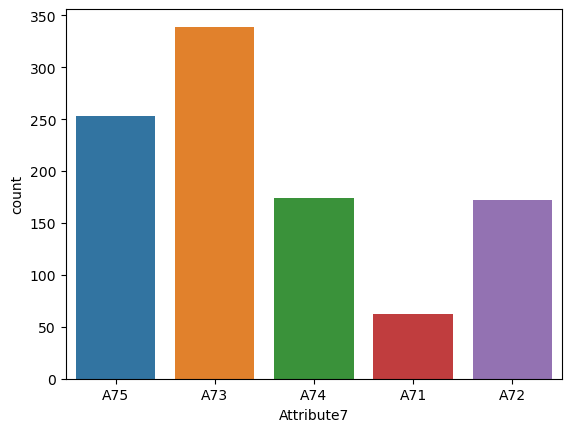

In [367]:
sns.countplot(x=df['Attribute7'])

In [368]:
'''
Observing the people considered to be bad creditors obs_bad as per our intuition
'''

'\nObserving the people considered to be bad creditors obs_bad as per our intuition\n'

<Axes: xlabel='Attribute1', ylabel='count'>

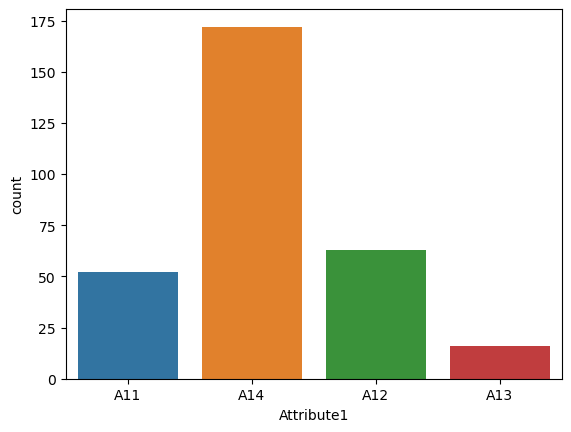

In [369]:
sns.countplot(x=obs_bad[obs_bad['class'] == 1]['Attribute1'])   #Making impact A11 is giving negative negative 

In [370]:
#Observations about the Attribute4 - Purposes

<Axes: xlabel='Attribute4', ylabel='count'>

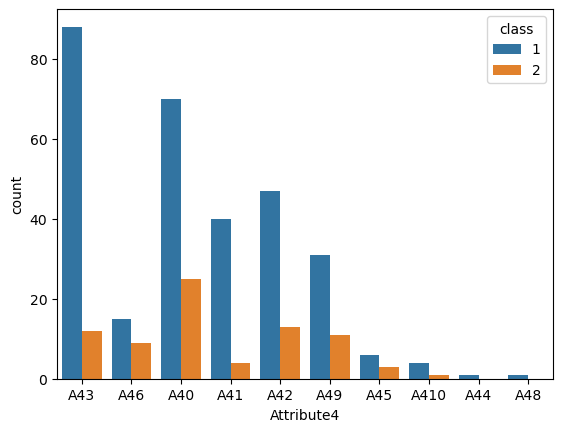

In [371]:
sns.countplot(x=obs_bad['Attribute4'],hue=obs_bad['class']) 

In [372]:
temp = obs_bad[obs_bad['Attribute4'] == 'A43']

In [373]:
temp.head(5)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
16,A14,24,A34,A43,2424,A65,A75,4,A93,A101,...,A122,53,A143,A152,2,A173,1,A191,A201,1
35,A12,45,A34,A43,4746,A61,A72,4,A93,A101,...,A122,25,A143,A152,2,A172,1,A191,A201,2
57,A14,36,A34,A43,9566,A61,A73,2,A92,A101,...,A123,31,A142,A152,2,A173,1,A191,A201,1
61,A12,15,A34,A43,1537,A65,A75,4,A93,A103,...,A121,50,A143,A152,2,A173,1,A192,A201,1


<Axes: xlabel='Attribute12', ylabel='count'>

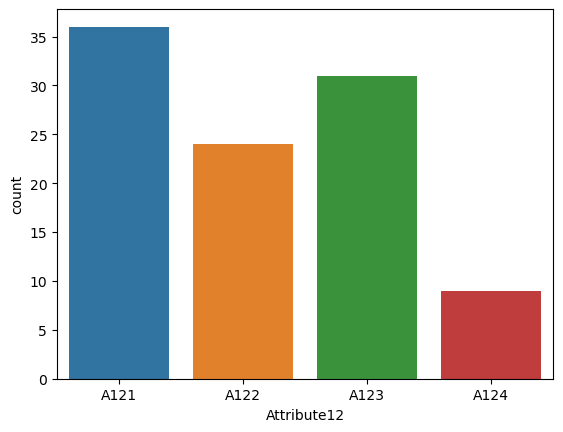

In [374]:
sns.countplot(x=temp['Attribute12'])        #Attribute12 : It is impacting

<Axes: xlabel='Attribute14', ylabel='count'>

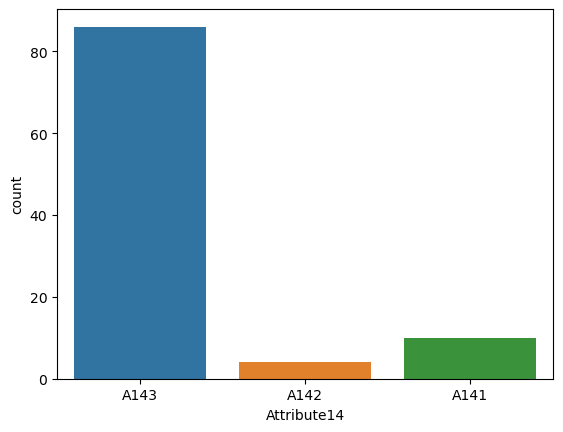

In [375]:
sns.countplot(x=temp['Attribute14'])    #Attribute14 is impacting

<Axes: xlabel='Attribute15', ylabel='count'>

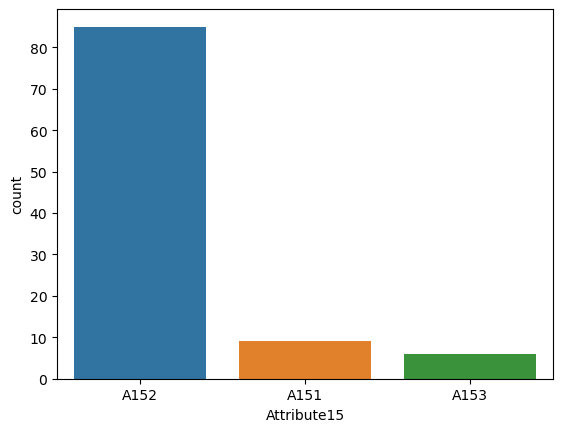

In [376]:
sns.countplot(x=temp['Attribute15'])    #It is also impacting

In [377]:
'''
Thus, observations are:
-> obs_bads are those people which falls in category of credit history : [A32, A33, A34]
    and among these people which have purpose of A43(radio/television) are observed,
    under these category we have some people which are given as good creditors which is condradictory to our intuition.
    Thus further observing the important features [Attribute12,Attribute14,Attribute15] for these kind of people.

->People with (A32,A33,A34) and (A43) have:
    (A121,A123) : Purpose of (Real Estate) or (car or other)
    (A143): No other installments
    (A152): Housing owners

    The above attributes signifies the good sign for credit returns.
'''

'\nThus, observations are:\n-> obs_bads are those people which falls in category of credit history : [A32, A33, A34]\n    and among these people which have purpose of A43(radio/television) are observed,\n    under these category we have some people which are given as good creditors which is condradictory to our intuition.\n    Thus further observing the important features [Attribute12,Attribute14,Attribute15] for these kind of people.\n\n->People with (A32,A33,A34) and (A43) have:\n    (A121,A123) : Purpose of (Real Estate) or (car or other)\n    (A143): No other installments\n    (A152): Housing owners\n\n    The above attributes signifies the good sign for credit returns.\n'

<Axes: xlabel='Attribute8', ylabel='count'>

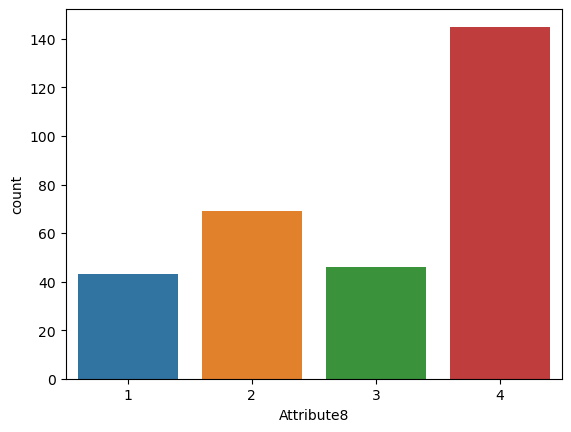

In [378]:
sns.countplot(x=obs_bad[obs_bad['class'] == 1]['Attribute8'])      #Making impact!, higher installment rate can result into bad creditors

<Axes: xlabel='Attribute8', ylabel='count'>

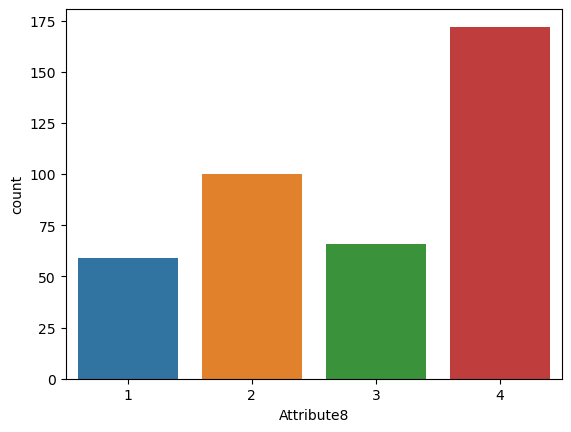

In [379]:
sns.countplot(x=obs[obs['class'] == 1]['Attribute8'])

<Axes: xlabel='Attribute12', ylabel='count'>

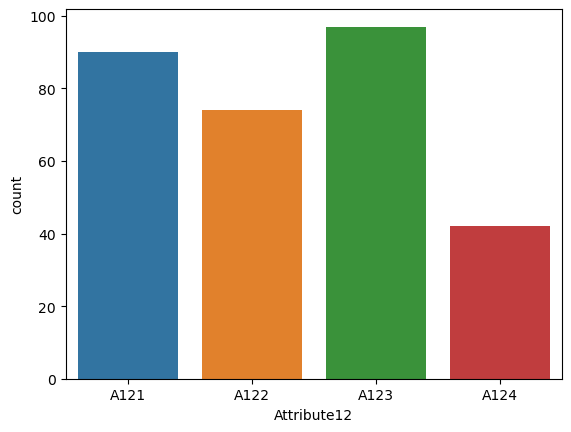

In [380]:
sns.countplot(x=obs_bad[obs_bad['class'] == 1]['Attribute12']) 

<Axes: xlabel='Attribute14', ylabel='count'>

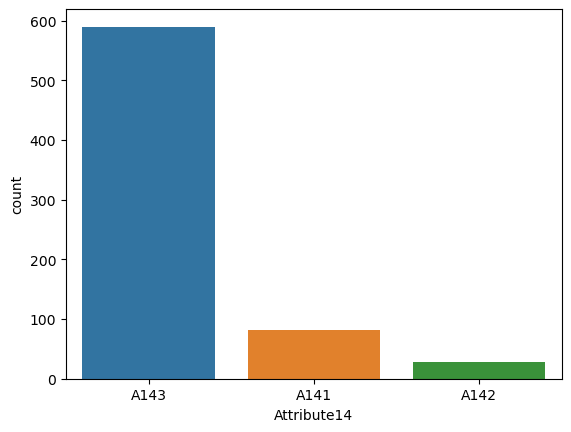

In [381]:
sns.countplot(x=df[df['class'] == 1]['Attribute14'])  #Making Impacting!, other installments are none for good creditors 

In [382]:
len(df[df['class'] == 1]['Attribute14'])

700

<Axes: xlabel='Attribute15', ylabel='count'>

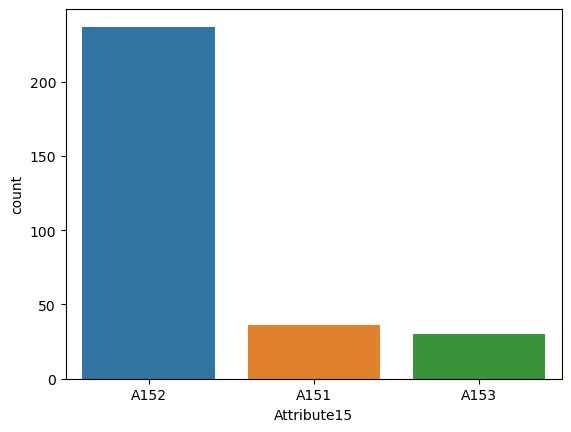

In [383]:
sns.countplot(x=obs_bad[obs_bad['class'] == 1]['Attribute15'])  #Making impact!, good creditors have housing owner.

<Axes: xlabel='Attribute15', ylabel='count'>

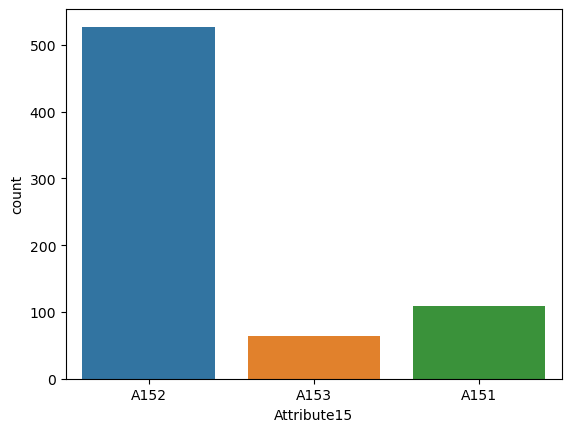

In [384]:
sns.countplot(x=df[df['class'] == 1]['Attribute15'])

<Axes: xlabel='Attribute7', ylabel='count'>

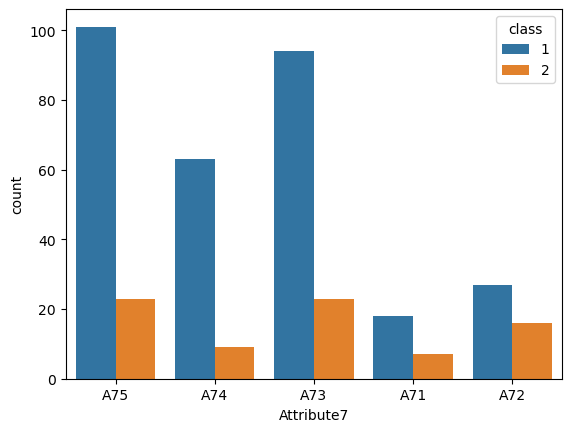

In [385]:
sns.countplot(x=obs_bad['Attribute7'],hue=obs_bad['class'])

In [386]:
discard_features

['Attribute9', 'Attribute13', 'Attribute11', 'Attribute20']

In [387]:
print("Before discarding: ",df.shape)
df1 = df.drop(discard_features,axis=1)
print("After discarding: ",df1.shape)
df1.head(5)

Before discarding:  (1000, 21)
After discarding:  (1000, 17)


,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute10,Attribute12,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,class
0,A11,6,A34,A43,1169,A65,A75,4,A101,A121,A143,A152,2,A173,1,A192,1
1,A12,48,A32,A43,5951,A61,A73,2,A101,A121,A143,A152,1,A173,1,A191,2
2,A14,12,A34,A46,2096,A61,A74,2,A101,A121,A143,A152,1,A172,2,A191,1
3,A11,42,A32,A42,7882,A61,A74,2,A103,A122,A143,A153,1,A173,2,A191,1
4,A11,24,A33,A40,4870,A61,A73,3,A101,A124,A143,A153,2,A173,2,A191,2


In [388]:
def marking(x,dict):
    for i in dict:
        if x in i:
            return dict[i]

In [389]:
#Target with [Attribute3 <-> Credit history]
credit_hist = {
    ('A30', 'A31'): 0,    #positive impact
    ('A32'): 1,           #neutral impact
    ('A33', 'A34'): 2     #negative impact
}

df1['Attribute3'] = df1['Attribute3'].apply(lambda x: marking(x, credit_hist))
df1.head(5)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute10,Attribute12,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,class
0,A11,6,2,A43,1169,A65,A75,4,A101,A121,A143,A152,2,A173,1,A192,1
1,A12,48,1,A43,5951,A61,A73,2,A101,A121,A143,A152,1,A173,1,A191,2
2,A14,12,2,A46,2096,A61,A74,2,A101,A121,A143,A152,1,A172,2,A191,1
3,A11,42,1,A42,7882,A61,A74,2,A103,A122,A143,A153,1,A173,2,A191,1
4,A11,24,2,A40,4870,A61,A73,3,A101,A124,A143,A153,2,A173,2,A191,2


In [390]:
#Target with [Attribute12 <-> Property]

property = {
    ('A121', 'A123'): 0,    #Positive Impact
    ('A122'): 1,    #Neutral Impact
    ('A124'): 2     #Negative Impact
}

df1['Attribute12'] = df1['Attribute12'].apply(lambda x: marking(x, property))
df1.head(5)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute10,Attribute12,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,class
0,A11,6,2,A43,1169,A65,A75,4,A101,0,A143,A152,2,A173,1,A192,1
1,A12,48,1,A43,5951,A61,A73,2,A101,0,A143,A152,1,A173,1,A191,2
2,A14,12,2,A46,2096,A61,A74,2,A101,0,A143,A152,1,A172,2,A191,1
3,A11,42,1,A42,7882,A61,A74,2,A103,1,A143,A153,1,A173,2,A191,1
4,A11,24,2,A40,4870,A61,A73,3,A101,2,A143,A153,2,A173,2,A191,2


In [391]:
#Target with [Attribute15 <-> Housing]

housing_imp = {
    ('A152'): 0, #positive impact
    ('A153'): 1, #neutral impact
    ('A151'): 2 #negative impact
}

df1['Attribute15'] = df1['Attribute15'].apply(lambda x: marking(x,housing_imp))
df1.head(5)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute10,Attribute12,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,class
0,A11,6,2,A43,1169,A65,A75,4,A101,0,A143,0,2,A173,1,A192,1
1,A12,48,1,A43,5951,A61,A73,2,A101,0,A143,0,1,A173,1,A191,2
2,A14,12,2,A46,2096,A61,A74,2,A101,0,A143,0,1,A172,2,A191,1
3,A11,42,1,A42,7882,A61,A74,2,A103,1,A143,1,1,A173,2,A191,1
4,A11,24,2,A40,4870,A61,A73,3,A101,2,A143,1,2,A173,2,A191,2


In [392]:
#Target with [Attribute14 <-> Other installment plans]
other_instal_imp = {
    ('A143'): 0,    #positive impact
    ('A141','A142'): 1  #negative impact
}

df1['Attribute14'] = df1['Attribute14'].apply(lambda x: marking(x,other_instal_imp))

df1.head(5)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute10,Attribute12,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,class
0,A11,6,2,A43,1169,A65,A75,4,A101,0,0,0,2,A173,1,A192,1
1,A12,48,1,A43,5951,A61,A73,2,A101,0,0,0,1,A173,1,A191,2
2,A14,12,2,A46,2096,A61,A74,2,A101,0,0,0,1,A172,2,A191,1
3,A11,42,1,A42,7882,A61,A74,2,A103,1,0,1,1,A173,2,A191,1
4,A11,24,2,A40,4870,A61,A73,3,A101,2,0,1,2,A173,2,A191,2


In [393]:
#Target with [Attribute10 <-> Other debtors / guarantors]

guarantors = {
    ('A101'): 0,    #Positive Impact
    ('A102','A103'): 1,    #Negative Impact
}

df1['Attribute10'] = df1['Attribute10'].apply(lambda x: marking(x, guarantors))
df1.head(5)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute10,Attribute12,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,class
0,A11,6,2,A43,1169,A65,A75,4,0,0,0,0,2,A173,1,A192,1
1,A12,48,1,A43,5951,A61,A73,2,0,0,0,0,1,A173,1,A191,2
2,A14,12,2,A46,2096,A61,A74,2,0,0,0,0,1,A172,2,A191,1
3,A11,42,1,A42,7882,A61,A74,2,1,1,0,1,1,A173,2,A191,1
4,A11,24,2,A40,4870,A61,A73,3,0,2,0,1,2,A173,2,A191,2


In [394]:
#Target with [Attribute7 <-> Status Employment]
employment = {
    ('A72','A73','A74', 'A75') : 0,  #Employed
    ('A71'): 1, #Unemployed
}

df1['Attribute7'] = df1['Attribute7'].apply(lambda x: marking(x,employment))
df1.head(5)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute10,Attribute12,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,class
0,A11,6,2,A43,1169,A65,0,4,0,0,0,0,2,A173,1,A192,1
1,A12,48,1,A43,5951,A61,0,2,0,0,0,0,1,A173,1,A191,2
2,A14,12,2,A46,2096,A61,0,2,0,0,0,0,1,A172,2,A191,1
3,A11,42,1,A42,7882,A61,0,2,1,1,0,1,1,A173,2,A191,1
4,A11,24,2,A40,4870,A61,0,3,0,2,0,1,2,A173,2,A191,2


In [395]:
#Target with [Attribute1 <-> Status of existing account]

acc_status = {
    ('A13','A14'): 0,    #Positive Impact
    ('A11','A12'): 1,    #Negative Impact
}

df1['Attribute1'] = df1['Attribute1'].apply(lambda x: marking(x, acc_status))
df1.head(5)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute10,Attribute12,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,class
0,1,6,2,A43,1169,A65,0,4,0,0,0,0,2,A173,1,A192,1
1,1,48,1,A43,5951,A61,0,2,0,0,0,0,1,A173,1,A191,2
2,0,12,2,A46,2096,A61,0,2,0,0,0,0,1,A172,2,A191,1
3,1,42,1,A42,7882,A61,0,2,1,1,0,1,1,A173,2,A191,1
4,1,24,2,A40,4870,A61,0,3,0,2,0,1,2,A173,2,A191,2


In [396]:
# df1['Attribute4'] = df['Attribute4']

In [397]:
# #Target with [Attribute4 <-> Purposes]
purpose_grouping = {
    ('A40', 'A41'): 0,
    ('A42', 'A43','A44'): 1,
    ('A46','A48'): 2,
    ('A49'): 3,
    ('A47','A410','A45'): 4,
}

df1['Attribute4'] = df1['Attribute4'].apply(lambda x: marking(x,purpose_grouping))
df1.head(5)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute10,Attribute12,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,class
0,1,6,2,1,1169,A65,0,4,0,0,0,0,2,A173,1,A192,1
1,1,48,1,1,5951,A61,0,2,0,0,0,0,1,A173,1,A191,2
2,0,12,2,2,2096,A61,0,2,0,0,0,0,1,A172,2,A191,1
3,1,42,1,1,7882,A61,0,2,1,1,0,1,1,A173,2,A191,1
4,1,24,2,0,4870,A61,0,3,0,2,0,1,2,A173,2,A191,2


In [398]:
#Target with [Attribute17 <-> Job]

job = {
    ('A171','A172'): 0,    #Not a good job
    ('A173','A174'): 1,    #Have a good job
}

df1['Attribute17'] = df1['Attribute17'].apply(lambda x: marking(x, job))
df1.head(5)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute10,Attribute12,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,class
0,1,6,2,1,1169,A65,0,4,0,0,0,0,2,1,1,A192,1
1,1,48,1,1,5951,A61,0,2,0,0,0,0,1,1,1,A191,2
2,0,12,2,2,2096,A61,0,2,0,0,0,0,1,0,2,A191,1
3,1,42,1,1,7882,A61,0,2,1,1,0,1,1,1,2,A191,1
4,1,24,2,0,4870,A61,0,3,0,2,0,1,2,1,2,A191,2


In [399]:
#Target with [Attribute6 <-> Savings acoount]

savings_acc = {
    ('A64','A63','A62'): 0,    #High Savings
    ('A61'): 1,    #Medium savings
    ('A65'): 2,    #No Savings
}

df1['Attribute6'] = df1['Attribute6'].apply(lambda x: marking(x, savings_acc))
df1.head(5)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute10,Attribute12,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,class
0,1,6,2,1,1169,2,0,4,0,0,0,0,2,1,1,A192,1
1,1,48,1,1,5951,1,0,2,0,0,0,0,1,1,1,A191,2
2,0,12,2,2,2096,1,0,2,0,0,0,0,1,0,2,A191,1
3,1,42,1,1,7882,1,0,2,1,1,0,1,1,1,2,A191,1
4,1,24,2,0,4870,1,0,3,0,2,0,1,2,1,2,A191,2


In [400]:
#Target with [Attribute19 <-> Telephone]

telephone  = {
    ('A191'): 0,    #No telephone registered
    ('A192'): 1,    #Registered telephone
}

df1['Attribute19'] = df1['Attribute19'].apply(lambda x: marking(x, telephone))
df1.head(5)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute10,Attribute12,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,class
0,1,6,2,1,1169,2,0,4,0,0,0,0,2,1,1,1,1
1,1,48,1,1,5951,1,0,2,0,0,0,0,1,1,1,0,2
2,0,12,2,2,2096,1,0,2,0,0,0,0,1,0,2,0,1
3,1,42,1,1,7882,1,0,2,1,1,0,1,1,1,2,0,1
4,1,24,2,0,4870,1,0,3,0,2,0,1,2,1,2,0,2


In [401]:
df_final = df1.copy(deep=True)

Data Preprocessing

In [405]:
def marking(x,dict):
    for i in dict:
        if x in i:
            return dict[i]

def preprocess(data_dict):
    data = pd.DataFrame(data_dict)

    discard_features = ['Attribute9', 'Attribute13', 'Attribute11', 'Attribute20']

    data.drop(discard_features,axis=1,inplace=True)

    dict =  {
        'Attribute1': {
            ('A13','A14'): 0,    #Positive Impact
            ('A11','A12'): 1,
        },
        'Attribute4': {
            ('A40', 'A41'): 0,
            ('A42', 'A43','A44'): 1,
            ('A46','A48'): 2,
            ('A49'): 3,
            ('A47','A410','A45'): 4,
        },
        'Attribute3': {
            ('A30', 'A31'): 0,
            ('A32'): 1, 
            ('A33', 'A34'): 2
        },
        'Attribute12':{
            ('A121', 'A123'): 0,
            ('A122'): 1,
            ('A124'): 2 
        },
        'Attribute15':{
            ('A152'): 0, #positive impact
            ('A153'): 1, #neutral impact
            ('A151'): 2
        },
        'Attribute14':{
            ('A143'): 0,    #positive impact
            ('A141','A142'): 1
        },
        'Attribute10':{
            ('A101'): 0,    #Positive Impact
            ('A102','A103'): 1,
        },
        'Attribute7':{
            ('A72','A73','A74', 'A75') : 0,  #Employed
            ('A71'): 1,
        },
        'Attribute17':{
            ('A171','A172'): 0,    #Not a good job
            ('A173','A174'): 1,
        },
        'Attribute6':{
            ('A64','A63','A62'): 0,    #High Savings
            ('A61'): 1,    #Medium savings
            ('A65'): 2,
        },
        'Attribute19':{
            ('A191'): 0,    #No telephone registered
            ('A192'): 1,
        }
    }

    for key in dict:
        data[key] = data[key].apply(lambda x: marking(x,dict[key]))

    return data

In [406]:
processed_data = preprocess(df)

In [408]:
processed_data.head(5)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute10,Attribute12,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,class
0,1,6,2,1,1169,2,0,4,0,0,0,0,2,1,1,1,1
1,1,48,1,1,5951,1,0,2,0,0,0,0,1,1,1,0,2
2,0,12,2,2,2096,1,0,2,0,0,0,0,1,0,2,0,1
3,1,42,1,1,7882,1,0,2,1,1,0,1,1,1,2,0,1
4,1,24,2,0,4870,1,0,3,0,2,0,1,2,1,2,0,2


Model Building

In [409]:
X = df_final.drop(['class'],axis=1)
X.head(5)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute10,Attribute12,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19
0,1,6,2,1,1169,2,0,4,0,0,0,0,2,1,1,1
1,1,48,1,1,5951,1,0,2,0,0,0,0,1,1,1,0
2,0,12,2,2,2096,1,0,2,0,0,0,0,1,0,2,0
3,1,42,1,1,7882,1,0,2,1,1,0,1,1,1,2,0
4,1,24,2,0,4870,1,0,3,0,2,0,1,2,1,2,0


In [410]:
y = df_final['class']
y.head(5)

0    1
1    2
2    1
3    1
4    2
Name: class, dtype: int64

In [411]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=40)

In [412]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [413]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [414]:
y_pred = rfc.predict(x_test)

In [415]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.755


In [421]:
xto = processed_data.drop('class',axis=1)
xto = xto.iloc[0]
xto.T

Attribute1        1
Attribute2        6
Attribute3        2
Attribute4        1
Attribute5     1169
Attribute6        2
Attribute7        0
Attribute8        4
Attribute10       0
Attribute12       0
Attribute14       0
Attribute15       0
Attribute16       2
Attribute17       1
Attribute18       1
Attribute19       1
Name: 0, dtype: int64

In [424]:
yp = rfc.predict(xto.to_frame().T)
yp[0]

1

Saving Model

In [416]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(rfc, f)